<a href="https://colab.research.google.com/github/huskeypm/cellmigration/blob/main/conda_openmm_pytraj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# brownian example
This notebook demonstrates the cell simulator using google colab.

- A recentish copy can be found in ./examples
- May need to change the Runtime/Runtime type to GPU
- Sometime session crashes after installation, but usually can rerun with the packages installed


## Setup
Enable cuda runtime first before starting session

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


In [1]:
!conda install -c conda-forge openmm ambertools=23

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



# All requested packages already installed.



Check that installation was successful

In [2]:
import openmm
import pytraj


Check that cuda is available (otherwise check at beginning the appropriate session was established)

In [3]:
import openmm as mm

platform = mm.Platform.getPlatformByName('CUDA')
properties = {'Precision': 'double'}

In [4]:
import matplotlib.pylab as plt
import numpy as np


CHeck out the cellmigration repo

In [5]:
!git clone https://github.com/huskeypm/cellmigration.git


Cloning into 'cellmigration'...
remote: Enumerating objects: 818, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 818 (delta 114), reused 101 (delta 100), pack-reused 684
Receiving objects: 100% (818/818), 13.55 MiB | 17.93 MiB/s, done.
Resolving deltas: 100% (521/521), done.


In [6]:
cd cellmigration

/content/cellmigration


Import model. Note, the version will likely keep incrementing higher, so check back for updates

In [7]:
import brownian_v5 as b5

## Simulate

Execute the simulator using a user-written yaml file. For more instructions on this, check out the readme in the repo

https://github.com/huskeypm/cellmigration/blob/main/tests/README.md



In [ ]:
dummy = b4.runBD(display=None, yamlFile="tests/effrad.yaml")

Adding nCells= 20
Adding cellRad= 10
Adding cellAttr= 1.0
Adding domainXDim= 140
Adding domainYDim= 100
Adding nCrowders= 9
Adding crowderRad= 25
Adding crowderDim= 100
Adding crowderAttr= 1.0
Adding effectiveRad= 10
Adding nUpdates= 1000
Adding friction= 100
Adding containmentPotential= square
Adding xPotential= False
Adding xScale= 0.1
Adding yPotential= False
Adding outName= crowder
None
TODO try removing
ADD ME
adding square containment potential
100.0 * z^2+ 0.0 * exp(-(y - -50.0)/25.)+ 0.0 * (x - -70.0)^1   +10*(max(0, -70.0-x) + max(0, x-70.0) + max(0, -50.0-y) + max(0, y-50.0));
Minimizing system
If stalls, there's probably a big clash somewhere
Running dynamics
(1/10)...
(2/10)...
(3/10)...
(4/10)...
(5/10)...
(6/10)...
(7/10)...
(8/10)...
(9/10)...
(10/10)...
Time(s):  4


## Analyze

Firstly, you can visualize the results in vmd, by downloading the vmd visualizer from https://www.ks.uiuc.edu/Development/Download/download.cgi?PackageName=VMD

You will also see a crowder.pdb and crowder.dcd dataset in ./cellmigration/ - download these and open with vmd

In [ ]:
outputData = 'crowder'

We could also analyze data inside the notebook.

Load libraries for analyzing data

In [8]:
import brown_util as bu
import pytraj as pt

In [ ]:
traj = bu.LoadTraj(outputData)

Loaded crowder.dcd


### Plot 2D trajectories

store the x and y coordinates of all particles with the mask @RC (the moving particles)

In [ ]:
mask = "@RC"
indices = pt.select_atoms(traj.top, mask)
xs = traj.xyz[0:,indices,0]
ys = traj.xyz[0:,indices,1]



Plot their trajectories

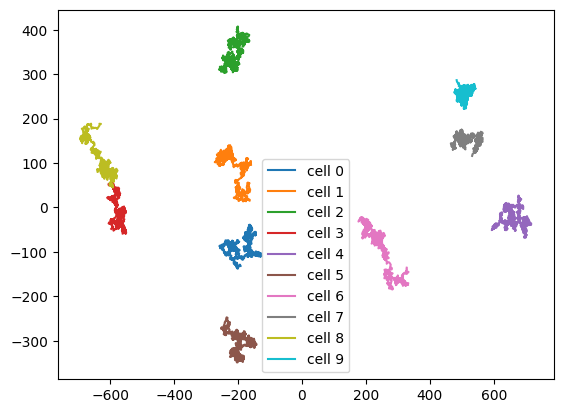

In [ ]:
nCells = np.shape(xs)[1]

plotCells = int(nCells/2) # just plotting five for now
for i in range(plotCells):
  plt.plot(xs[:,i],ys[:,i],label="cell %d"%i)

plt.legend(loc=0)

### compute the diffusion coefficient

In [ ]:
Di=bu.CalcD(traj,mask='@RC') # ,display=True) # this will be fixed momentarily

In [ ]:
print("Diff coefficient is ",Di)

Diff coefficient is  0.20849860303816847


### plot histogram of particle positions.
These are the areas (top) and relative energies (bottom) of the regions that the particles sampled

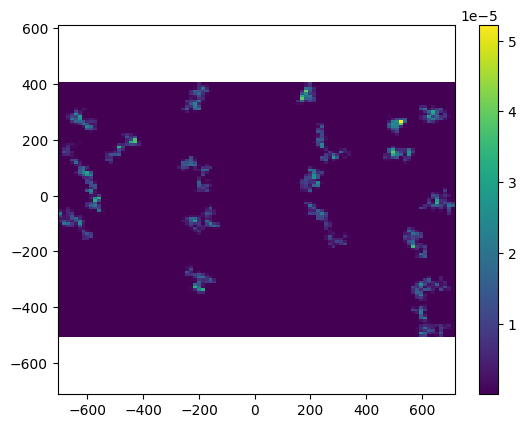

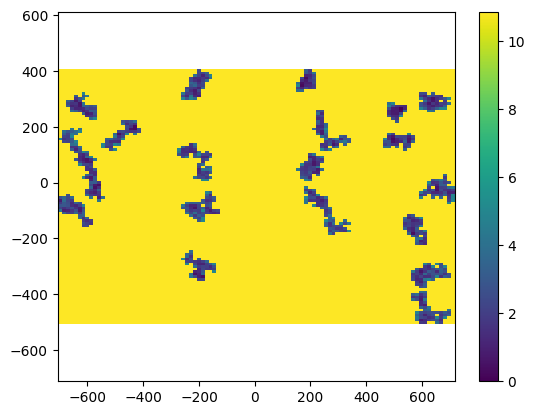

In [ ]:
  dummy = bu.CalcProbDist(traj,mask='@RC',display=True)

Example for computing displacements along y
* copied to local directory
* uploaded to this instance

Loaded /content/nocrowder_nocontainment_xScale1.000000_00.dcd


In [26]:
def GetDeltaX(outputData,mask="@RC"):
  traj = bu.LoadTraj(outputData)

  tMax = -1
  indices = pt.select_atoms(traj.top, mask)
  x0s = traj.xyz[0,indices,0]
  xFs = traj.xyz[tMax,indices,0]
  DeltaXs = xFs - x0s
  print(np.mean(DeltaXs))
  print(np.std(DeltaXs))
  ns,bins = np.histogram(DeltaXs)
  return ns,bins

Loaded /content/nocrowder_nocontainment_xScale0.000000_00.dcd
101.44897406895956
451.5373013751241
Loaded /content/nocrowder_nocontainment_xScale1.000000_00.dcd
5.051988124847412
482.326966087882


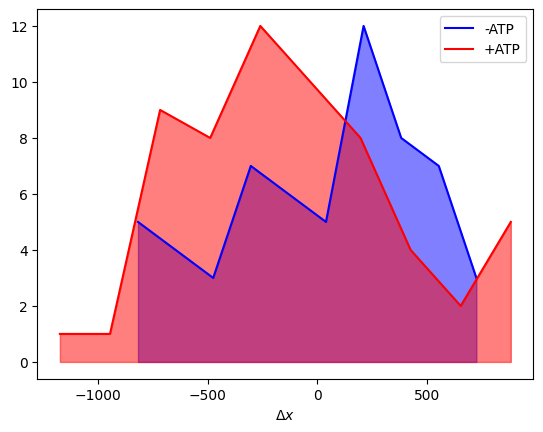

In [38]:
outputData    ="/content/nocrowder_nocontainment_xScale0.000000_00"
outputDataATP ="/content/nocrowder_nocontainment_xScale1.000000_00"

ns,bins = GetDeltaX(outputData)
plt.plot(bins[0:-1],ns,color='b',label="-ATP")
plt.fill_between(x=bins[0:-1],y1=ns,color='b',alpha=0.5)

ns,bins = GetDeltaX(outputDataATP)
plt.plot(bins[0:-1],ns,color='red',label="+ATP")
plt.fill_between(x=bins[0:-1],y1=ns,color='r',alpha=0.5)
plt.xlabel("$\Delta x$")

plt.legend(loc=0)
plt.gcf().savefig("/content/distro.png",dpi=300)

## More tips
- See the README.md files for more tips on configuring simulations using yaml files
- Use pytraj documention to perform additional analyses (https://amber-md.github.io/pytraj/latest/index.html)